## 1. Problem Statement


- The main goal is to predict whether the student will be recruited in campus placements or not based on the available factors in the dataset.

## 2. Data Collection

- Data source :- https://www.kaggle.com/c/ml-with-python-course-project/data
- This data consist of 215 rows × 14 columns.

## 2.1 Import Library's and Data Set

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
%matplotlib inline

In [3]:
placement=pd.read_excel("C:/Users/Armaan/OneDrive/Documents/placement.xlsx")

In [4]:
placement['gender'].replace({0:"M",1:"F"},inplace=True)

In [5]:
placement

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


## 2.2 Data information

- Gender:- gender identification M or F
- ssc_p:- SSC percentage
- ssc_b:- information about SSC board i.e. central board or state board. State board is with respect to a particular state.
- hsc_p:- HSC percentage
- hsc_b:- information about HSC board i.e. central board or state board. State board is with respect to a particular state.
- hsc_s:- which branch completed the HSC? Commerce, science, and art
- degree_p:- Degree percentage
- degree_t:- which branch completed the degree? sci&tech and comm&mgmt
- workex:- any work experience ‘YES’ or ‘NO’
- etest_p:- test percentage
- specialisation:- branch specialization i.e. Mkt&HR, Mky&Fin
- mba_p:- MBA percentage
- Status:- About placement, he/she placed or not placed



## 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

## 3.1 Common Questions

- Does GPA affect placement?
- Does Higher Secondary School's Percentage still affect campus placement?
- Is work experience required for securing good job?

## 3.1 Check Missing values

In [6]:
placement.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

#### Insights
- In salary column we have missing value's of total 67  but since we are findind the feature that affect placement status we can ignore salary column.

## 3.2 Checking Data Type

In [7]:
placement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


#### Insights

- Out of 13  column's after ignoring sl.no and salary 
- We have 5 numerical column's i.e float64 (ssc_p, hsc_p, degree_p, etest, mba_p)
- We have 8 categorical column's i.e objects (ssc_b, hsc_b, hsc_s,degree_t, workex, specialisation, status)

## 3.3 Checking duplicate Values

In [8]:
placement.duplicated().sum()

0

#### Insights 
- There is no duplicated value's in the dataset

## 3.4 Checking the number of unique values of each column

In [9]:
placement=placement.drop(['sl_no',"salary"], axis =1)

In [10]:
placement.nunique()

gender              2
ssc_p             103
ssc_b               2
hsc_p              97
hsc_b               2
hsc_s               3
degree_p           89
degree_t            3
workex              2
etest_p           100
specialisation      2
mba_p             205
status              2
dtype: int64

## 3.5 Check statistics of data set

In [11]:
placement.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


#### Insights

- From above description of numerical data, all the column's means ranges- between 62.27 and 67.30 accept one 72.10 which is Entrance test percentage mean;
- Standard deviations range's between 5.83 to 13.27
- we have different min amd max percentage with respect to column's 
- Out of all column's hsc_p have the Min percentage 37
- Out of all the column's etest_p have the max percentage of 98

## 4 Explodatory Data throught visualisation

- let us study the effect of different feature on placement status

### 4.1 Exploring Data by each Features


####  1 : Gender

#### Does gender affect placements?

M    139
F     76
Name: gender, dtype: int64


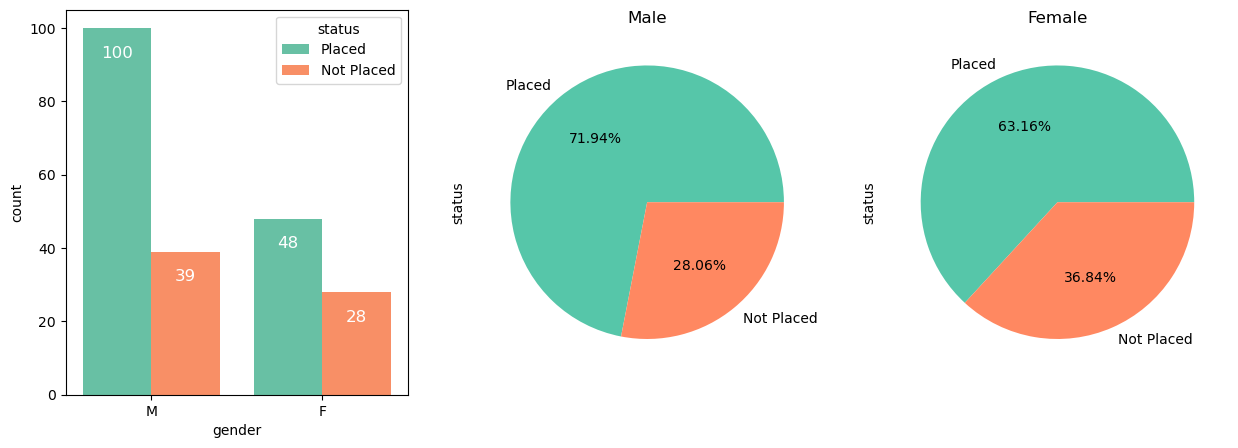

In [57]:
g=placement.gender.value_counts()
print(g)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
ax=sns.countplot(x="gender", hue="status", data=placement,palette='Set2',saturation=0.95)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=12)

colors = ["#56c6a9","#ff8861"]

plt.subplot(1,3,2)
placement.query('gender == "M"')['status'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', title = 'Male',colors=colors)

plt.subplot(1,3,3)
placement.query('gender == "F"')['status'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', title = 'Female',colors=colors)


plt.show()

#### Insights 

- We have total samples of 139 Male studets and 76 Female students.
- Out of which  40 Male students and 30 Female are not placed.
- Male students have comparatively higher placemets.
- Gender fearure affect placement status

### 2 ssc percentage

####  ssc_p affect placement or not?

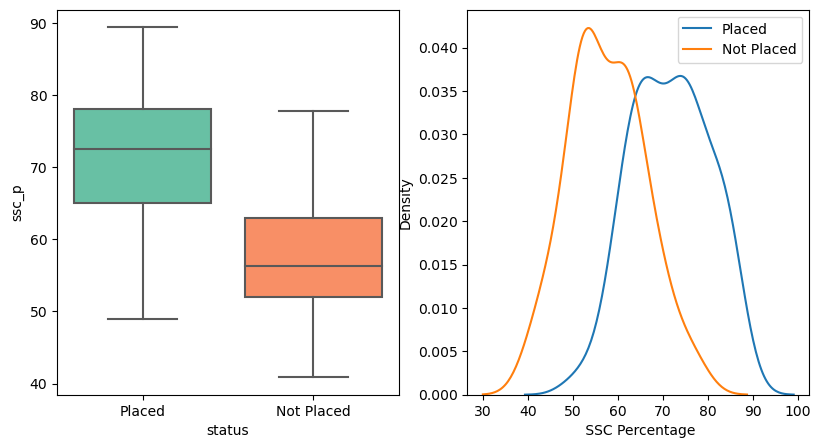

In [41]:
plt.figure(figsize=(15,5))


plt.subplot(1,3,1)
sns.boxplot("status","ssc_p",data=placement,palette='Set2',saturation=0.95)

#Kernel-Density Plot
plt.subplot(1,3,2)
sns.kdeplot(placement.ssc_p[ placement.status=="Placed"],)
sns.kdeplot(placement.ssc_p[ placement.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel(" SSC Percentage")
plt.show()

#### Insights

- As we can see student who has more than 70 percentage in secondary Education are almost all placed.
- Student who has 50 or less are not placed.


### 3 SSC_board


#### affect of SSC_board on placement

In [13]:
placement.ssc_b.value_counts()

Central    116
Others      99
Name: ssc_b, dtype: int64

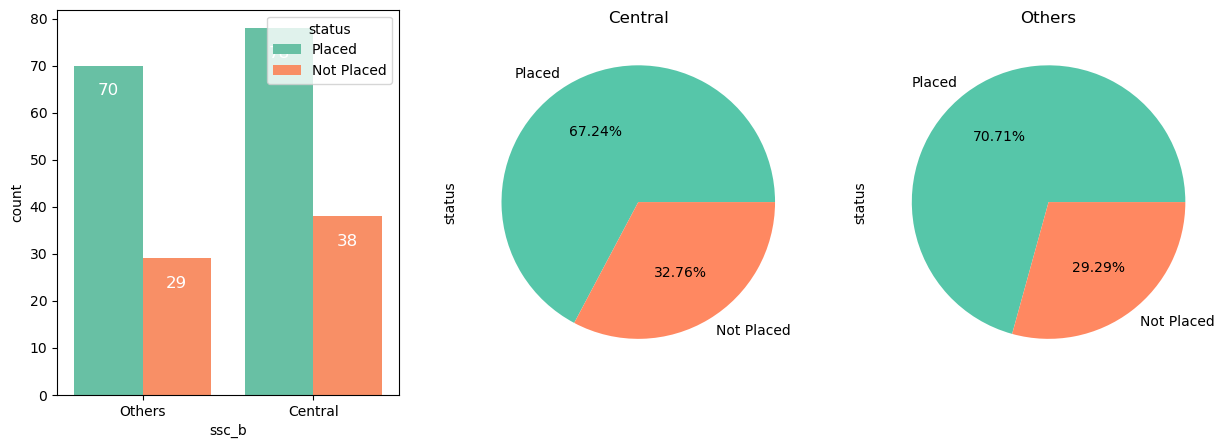

In [58]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
ay=sns.countplot(x="ssc_b", hue="status", data=placement,palette='Set2',saturation=0.95)

for p in ay.patches:
    ay.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=12)

colors = ["#56c6a9","#ff8861"]
plt.subplot(1,3,2)
placement.query('ssc_b == "Central"')['status'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', title = 'Central',colors=colors)

plt.subplot(1,3,3)
placement.query('ssc_b == "Others"')['status'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', title = 'Others',colors=colors)


plt.show()

##### Insights

- A total of 116 students are from central education board.
- A total of 99 students are from other education board.
- Placed to Not Placed ratio from both educatiob board looks same.
- Education Board doesn't seems to be effecting the placement stauts.

## 4 HSC_percentage

#### hsc_p affect the placement or not?

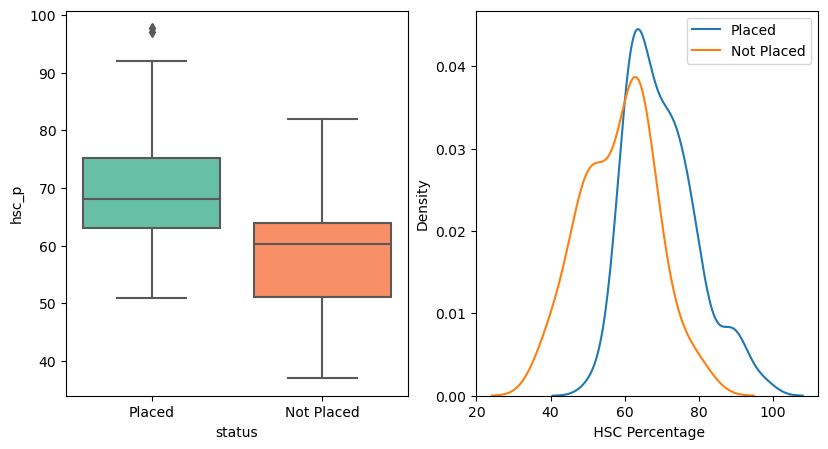

In [59]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot("status","hsc_p",data=placement,palette='Set2',saturation=0.95)

#Kernel-Density Plot
plt.subplot(1,3,2)
sns.kdeplot(placement.hsc_p[ placement.status=="Placed"])
sns.kdeplot(placement.hsc_p[ placement.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel(" HSC Percentage")
plt.show()

#### Insights

- Here also students who get percentage above 60 or 65 are getting placement.
- Below 60% students are not getting placement.
- Therefore Perntage must be atleast 60 for chance of being placed.

## 5 hsc_board

#### hsc_b affect palacement status or not?

In [16]:
placement.hsc_b.value_counts()

Others     131
Central     84
Name: hsc_b, dtype: int64

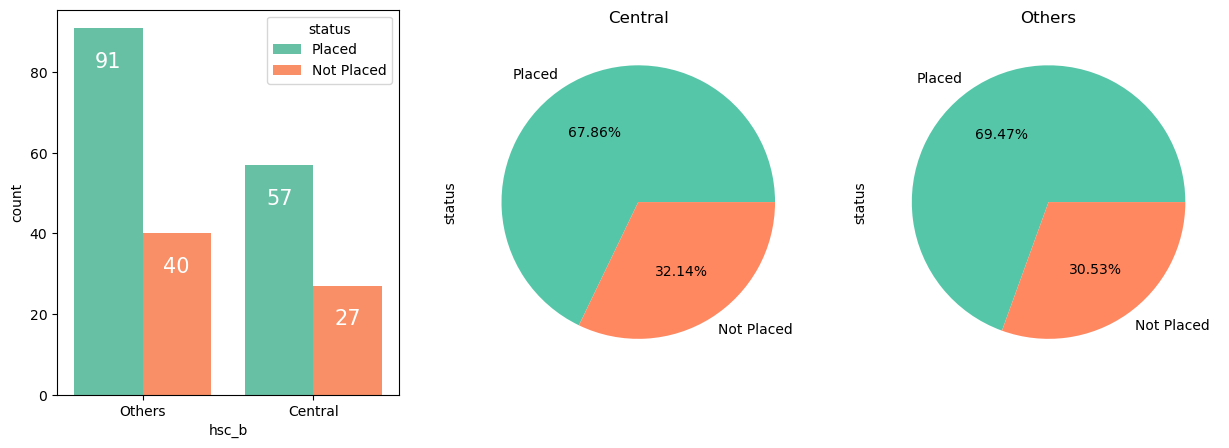

In [60]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
az=sns.countplot(x="hsc_b",hue="status", data=placement,palette='Set2',saturation=0.95)

for p in az.patches:
    az.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=15)

colors = ["#56c6a9","#ff8861"]
plt.subplot(1,3,2)
placement.query('hsc_b == "Central"')['status'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', title = 'Central',colors=colors)

plt.subplot(1,3,3)
placement.query('hsc_b == "Others"')['status'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', title = 'Others',colors=colors)


plt.show()

##### Insights

- A total of 131 students are from Other education board.
- A total of 84 students are from Central education board.
- Placed to Not Placed ratio from both educatiob board looks same.
- Education Board doesn't seem's to be effecting the placement stauts much.

### 6 hsc_subject

#### hsc_s affect the placement or not?

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64


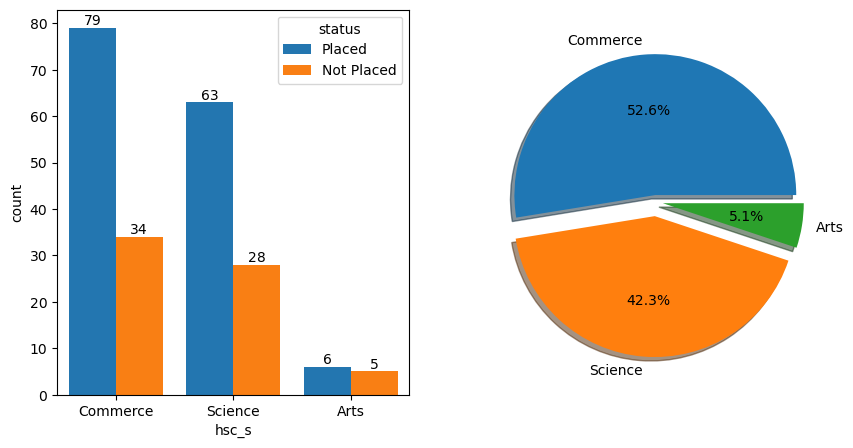

In [18]:
x=placement.hsc_s.value_counts()
print(x)

f,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x=placement['hsc_s'],hue="status",data=placement,ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
    
    
    
plt.pie(x=placement['hsc_s'].value_counts(),labels=['Commerce','Science',"Arts"],explode=[0.05,0.1,0.05],autopct='%1.1f%%',shadow=True)
plt.show()

In [19]:
sns.countplot(x=placement['hsc_s'],hue="status",data=placement,ax=ax[0],saturation=0.95,palette = 'bright')
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.show()

#### Insights

- We have 3 subjects in HSC Commerce, Science and Arts
- In Commerce their are 113 students out of which 79 are placed.
- In Science their are 91 students out which 63 are placed.
- In Arts out of 11 students 6 are placed.

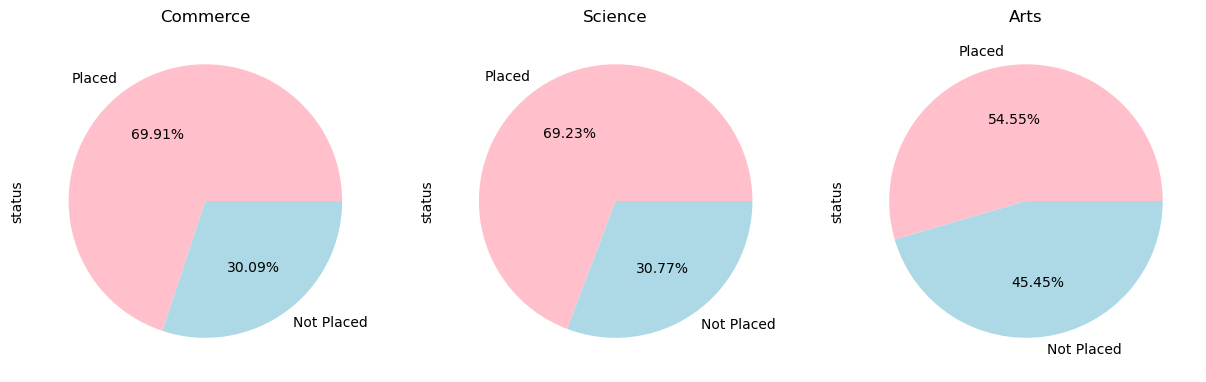

In [62]:
plt.figure(figsize=(15,5))

colors = ['pink', 'lightblue']

plt.subplot(1,3,1)
placement.query('hsc_s == "Commerce"')['status'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', title = 'Commerce',colors=colors)

plt.subplot(1,3,2)
placement.query('hsc_s == "Science"')['status'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', title = 'Science',colors=colors)

plt.subplot(1,3,3)
placement.query('hsc_s == "Arts"')['status'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', title = 'Arts',colors=colors)

plt.show()

- Commerce and Science have almost same 2:1 ratio of Placed:Not Placed. 
- Whereas Arts have very less students.

### 7 degree_p

#### Thus under graduate degree  affect placement?

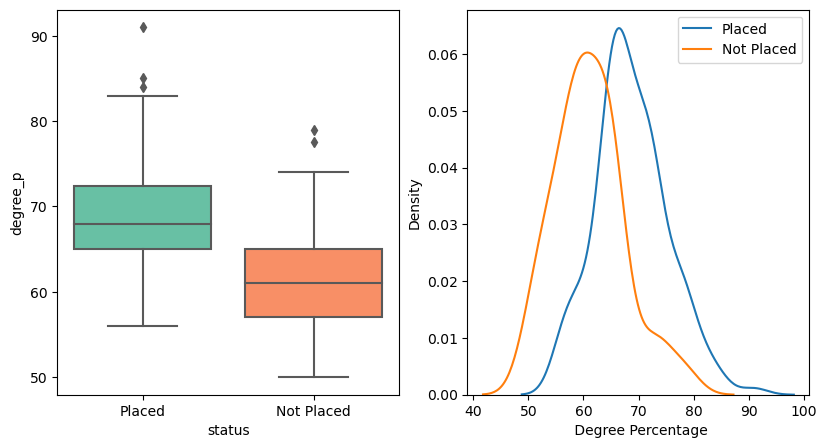

In [63]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot("status","degree_p",data=placement,palette='Set2',saturation=0.95)

#Kernel-Density Plot
plt.subplot(1,3,2)
sns.kdeplot(placement.degree_p[ placement.status=="Placed"])
sns.kdeplot(placement.degree_p[ placement.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel(" Degree Percentage")
plt.show()

#### Insights 

- As we can see students with percentage above 65 are getting placement, and above 70 almost all students are placed.
- In UG atleast  50% is required for placement. 
- There are some outliers in the data where even after getting good percentage they are not placed.

### 8 degree_t

#### Thus degree_t  affect placement?

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64


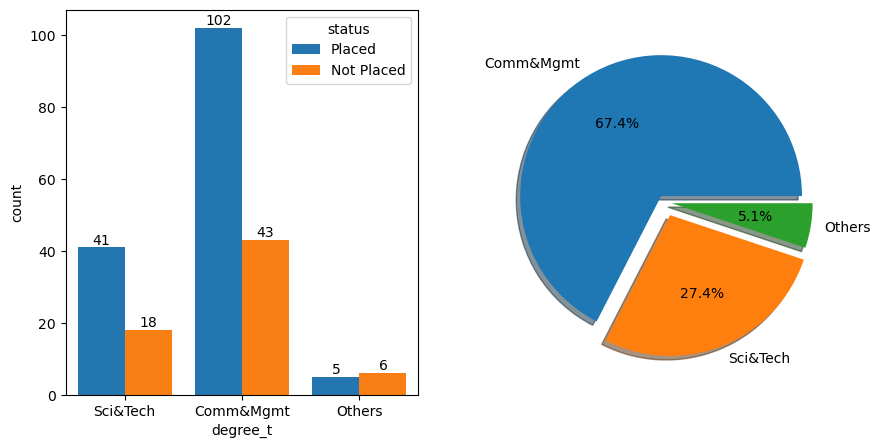

In [22]:
t=placement.degree_t.value_counts()
print(t)

f,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x=placement['degree_t'],hue="status",data=placement,ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
    
    
    
plt.pie(x=placement['degree_t'].value_counts(),labels=['Comm&Mgmt','Sci&Tech',"Others"],explode=[0.05,0.1,0.05],autopct='%1.1f%%',shadow=True)
plt.show()

#### Insights

- We have very less students with "Other" i.e 11.  We cant make decision from few cases.
- We have 2:1 placed:unplaced ratio for both Science and Commerse students

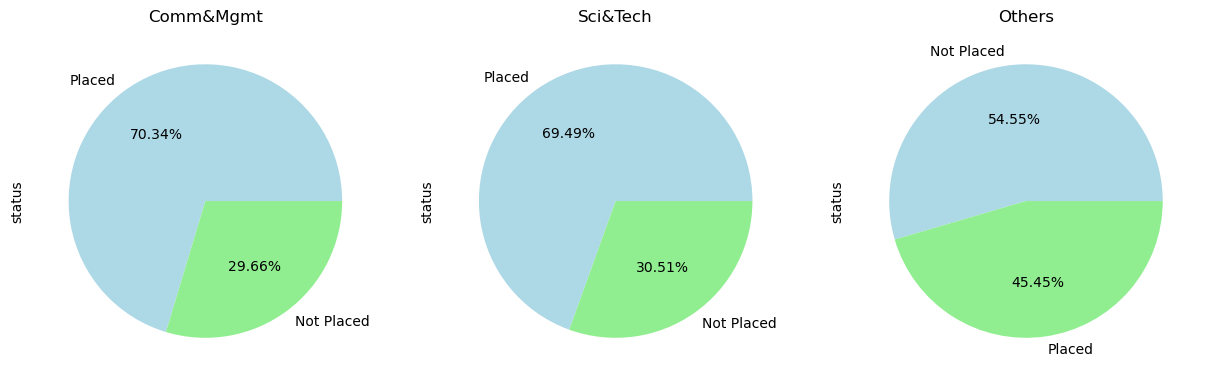

In [65]:
plt.figure(figsize=(15,5))

colors = ['lightblue', 'lightgreen']

plt.subplot(1,3,1)
placement.query('degree_t == "Comm&Mgmt"')['status'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', title = 'Comm&Mgmt',colors=colors)

plt.subplot(1,3,2)
placement.query('degree_t == "Sci&Tech"')['status'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', title = 'Sci&Tech',colors=colors)

plt.subplot(1,3,3)
placement.query('degree_t == "Others"')['status'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', title = 'Others',colors=colors)

plt.show()

# 9 workex

No     141
Yes     74
Name: workex, dtype: int64


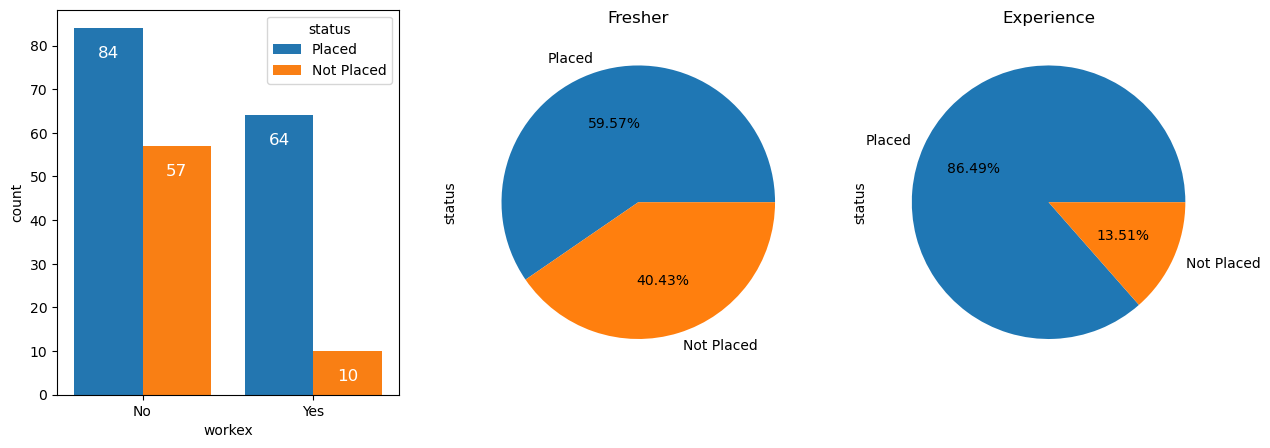

In [24]:
w=placement.workex.value_counts()
print(w)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
ax=sns.countplot(x="workex", hue="status", data=placement,saturation=0.95)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=12)


plt.subplot(1,3,2)
placement.query('workex == "No"')['status'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', title = 'Fresher')

plt.subplot(1,3,3)
placement.query('workex == "Yes"')['status'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', title = 'Experience')


plt.show()

#### Insights 

- So we have 141 fresher's students and 74 students who has worked experience.
- Experience students are getting placed more.
- This affects placements very less students are not getting placed who has experience.

# 10 etest_p

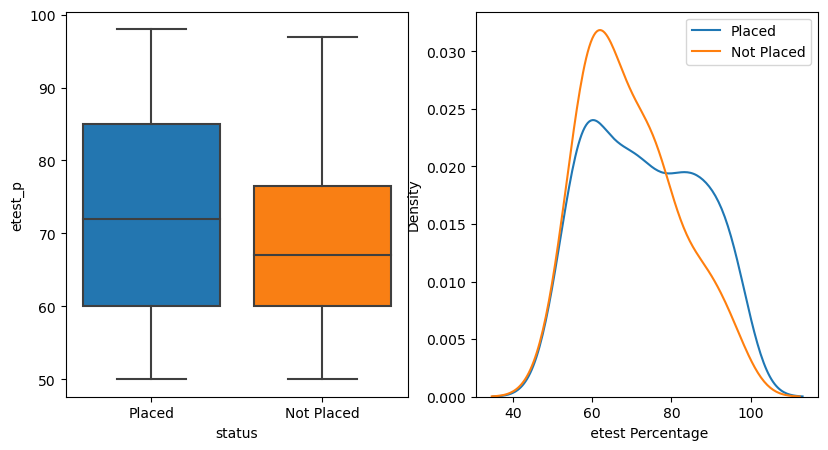

In [25]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot("status","etest_p",data=placement,saturation=0.95)

#Kernel-Density Plot
plt.subplot(1,3,2)
sns.kdeplot(placement.etest_p[ placement.status=="Placed"])
sns.kdeplot(placement.etest_p[ placement.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel(" etest Percentage")
plt.show()

#### Insights

- It does not affect placement status much. the graphs are High overlaping each other.
- More "Not Placed" students on percentage 50-70 range and more placed students on 80% percentage or above.

# 11 specialisation

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64


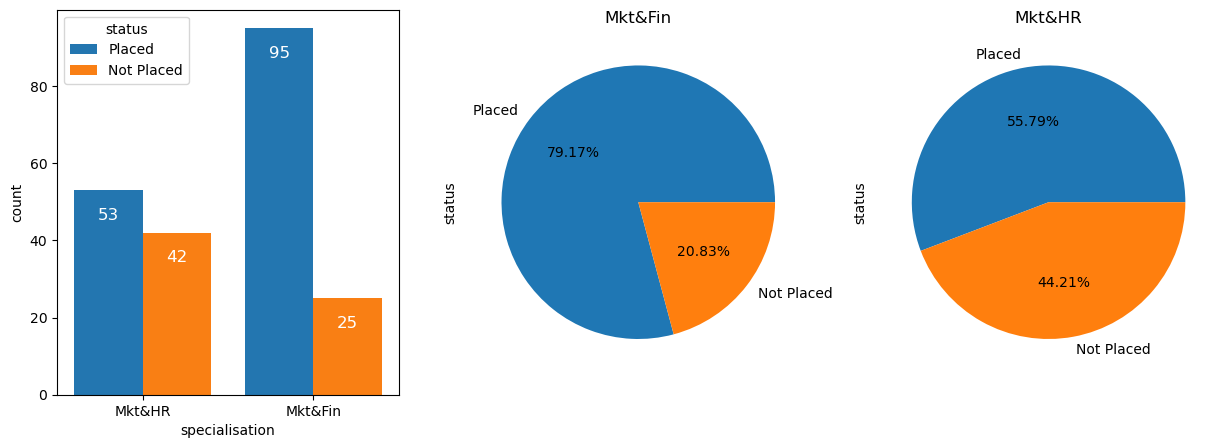

In [26]:
s=placement.specialisation.value_counts()
print(s)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
ax=sns.countplot(x="specialisation", hue="status", data=placement,saturation=0.95)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=12)


plt.subplot(1,3,2)
placement.query('specialisation == "Mkt&Fin"')['status'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', title = 'Mkt&Fin')

plt.subplot(1,3,3)
placement.query('specialisation == "Mkt&HR"')['status'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', title = 'Mkt&HR')


plt.show()

#### Insights

- There are 120 MK&Fin students and 95 MK&HR students
- Out of which MK&Fin students are getting more placements then MK&HR students
- This feature affects Placement status.


# 12 mba_p

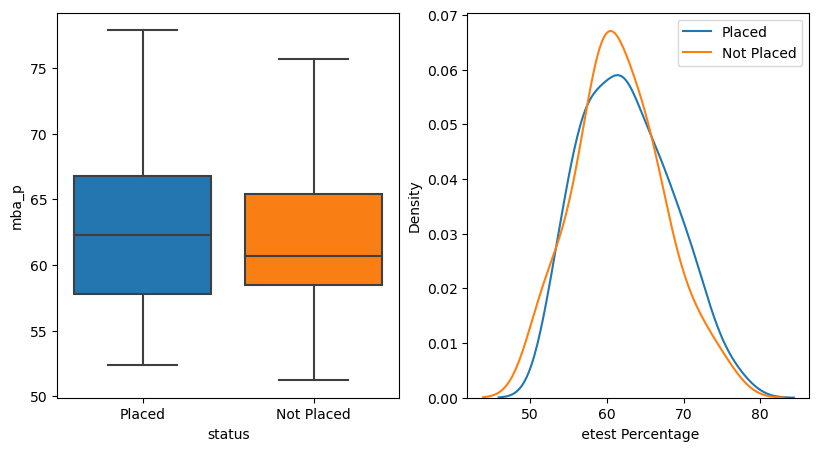

In [27]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot("status","mba_p",data=placement,saturation=0.95)

#Kernel-Density Plot
plt.subplot(1,3,2)
sns.kdeplot(placement.mba_p[ placement.status=="Placed"])
sns.kdeplot(placement.mba_p[ placement.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel(" etest Percentage")
plt.show()

#### Insights

- suprisingly this does not affect status 
- Both the grapth's are completely overlap with each other.

# 4.2 checking correlation

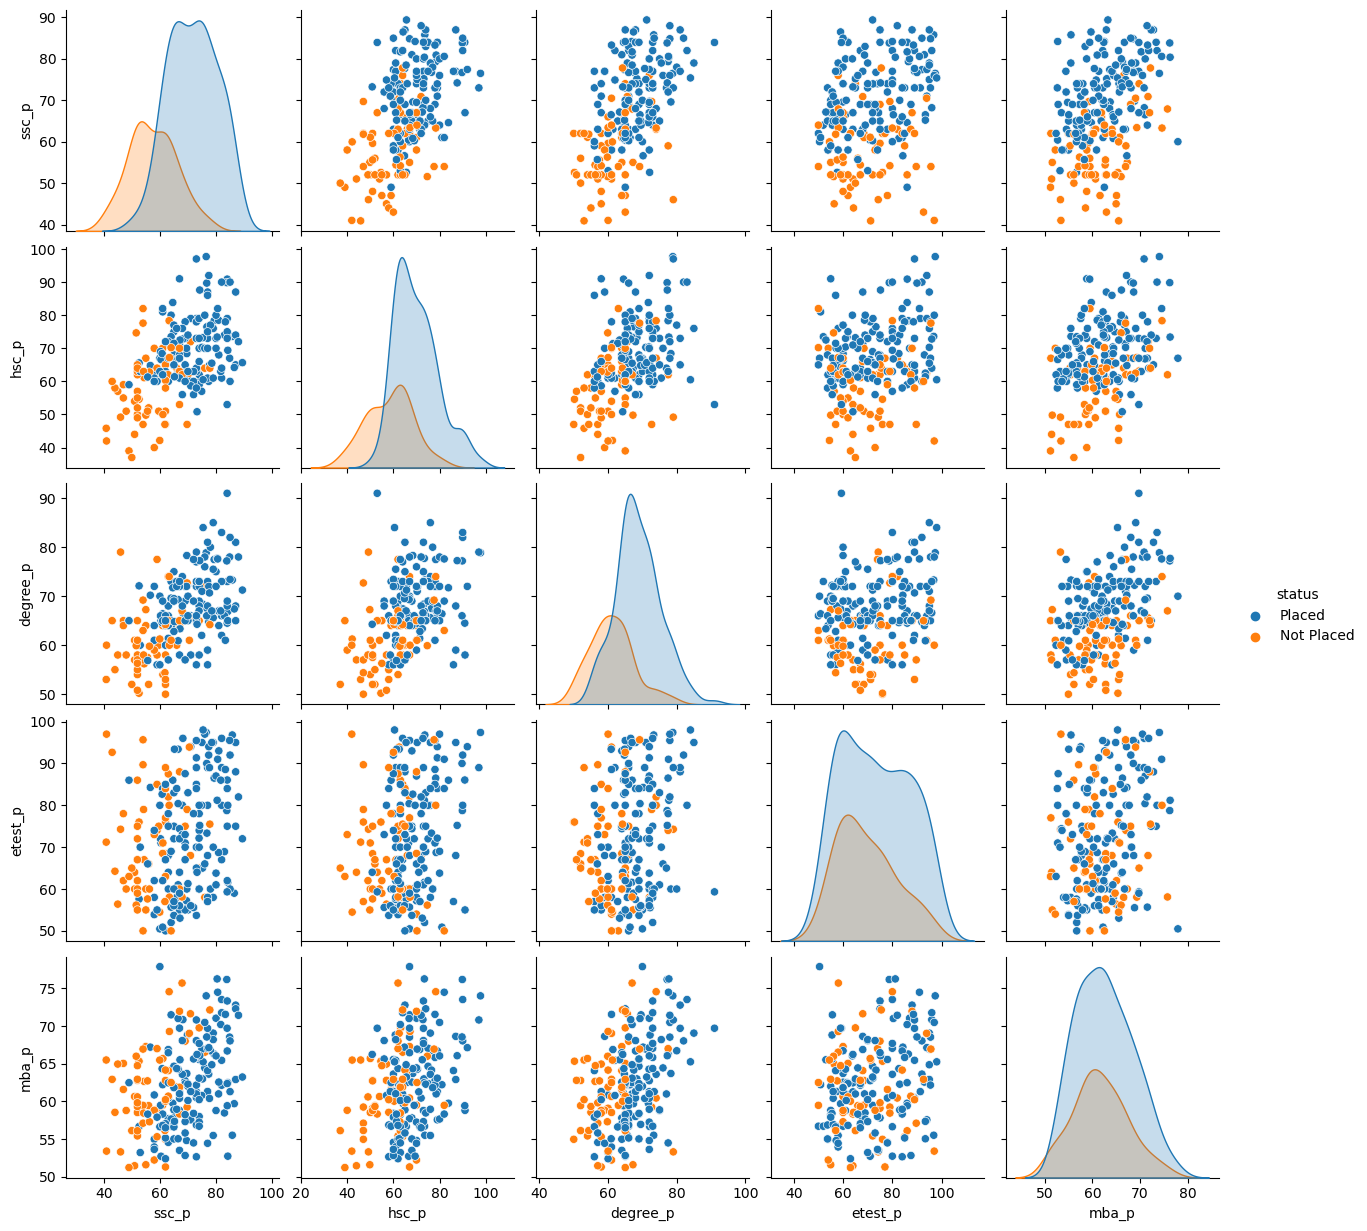

In [28]:
sns.pairplot(placement, hue = 'status')
plt.show()

#### Insights

- From the above plot we cannot say that all percentage increases linearly with each other.

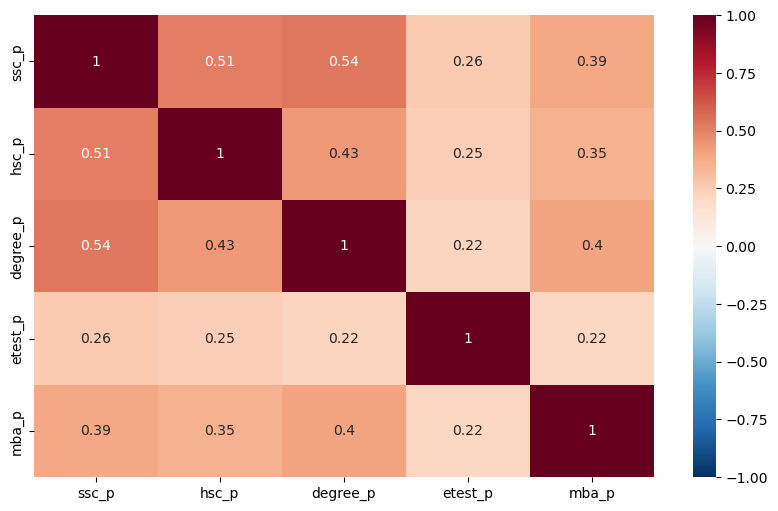

In [29]:
plt.figure(figsize = (10,6))
sns.heatmap(placement.corr(), vmin = -1.0, vmax = 1.0, center = 0, cmap ='RdBu_r', annot = True)
plt.show()

### Conclusion

#### Students placement is related to this Features

- Gender
- Secondary Education percentage
- Higher Secondary Education Percentsge
- Specialization in Higher Secondary Education
- Under Graduate Dergree Percentage
- Under Graduation Degree Field
- Work Experience
- Employability test percentage
- Specialization


In [32]:
placement.to_csv('campus_data.csv', index=False)